# 1. Scikit-learn Setup, and Checking Dependencies

In [1]:
#scikit-learn, Remove comment '#' below to install
#pip install -U scikit-learn

In [2]:
#Version Check - should be 1.3.2; Remove comment '#' below to check
#pip show scikit-learn  # to see which version and where scikit-learn is installed

In [3]:
#importing sklearn and checking for dependencies
import sklearn
#Remove comment '#' below to show versions
#sklearn.show_versions()

# 2. Importing and Exploring the Dataset

In [4]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing as get_data

In [5]:
#Basic check on X,Y vals, remove comment '#'s below to print
#x,y = sklearn.datasets.fetch_california_housing(return_X_y=True)
#print(x,y)

In [6]:
#Dataset Description
data = get_data(as_frame=True)

#Dataset Description,  remove comment '#' below to print
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
#exploring dataset as DataFrame
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


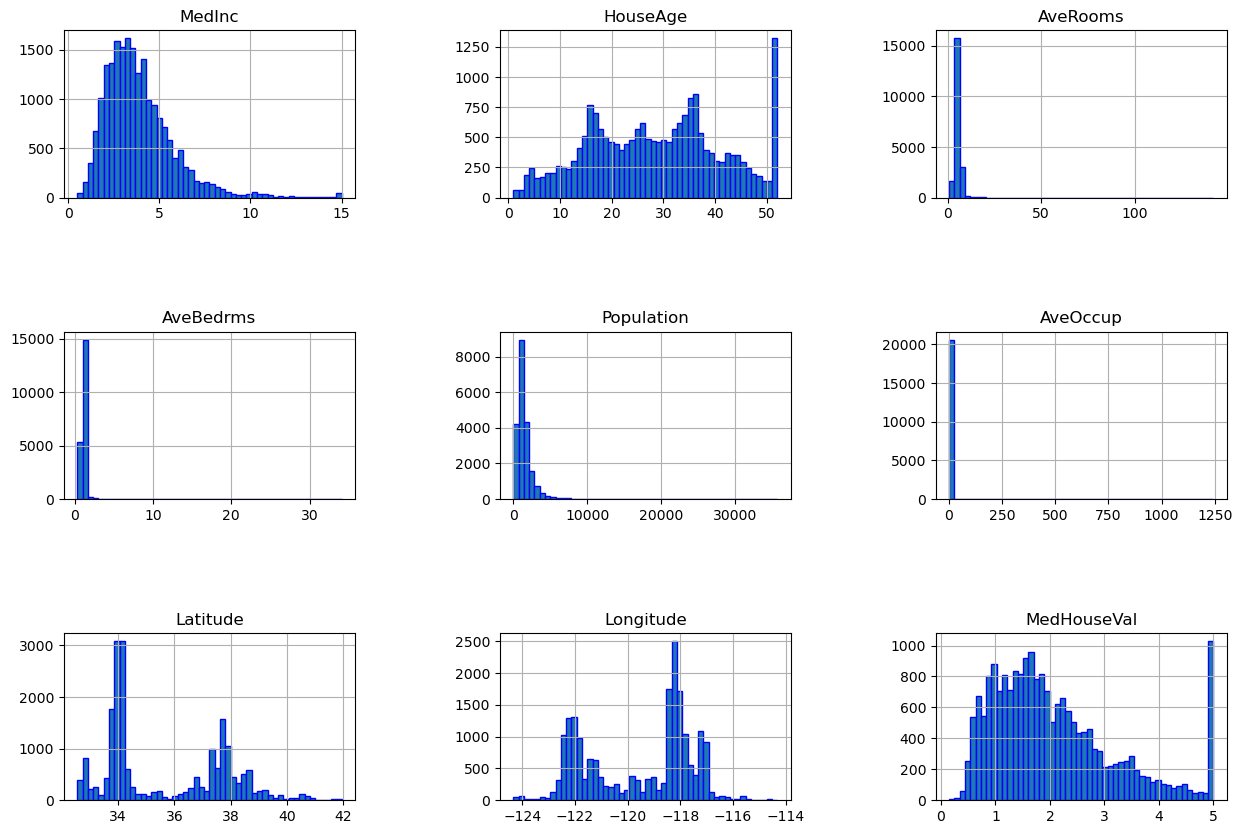

In [8]:
#plotting out dataset
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10), bins=50, edgecolor="blue")
plt.subplots_adjust(hspace=0.8,wspace = 0.5)

In [9]:
#Takeaways: Immediate link between Median Income and Median House Value (target), 
#and between Average Rooms, Average Bedrooms, Average Occupation, and Population
#Longtitude and Latitude seem unrelated for now

In [10]:
#Dataset is well-made, no NA Values, Remove comment '#'s for proof
#len(df)

In [11]:
#len(df.dropna())

# 3. Creating Training and Testing Data

In [12]:
#new data ref needed, no longer as frame
data = get_data()
X = data["data"]
y = data["target"]

In [13]:
#check on data in default format
print("data:",X)
print("target:",y)

data: [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
target: [4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [14]:
#splitting training and test data, done to test model after training on unfamiliar data
from sklearn.model_selection import train_test_split as tts
#this creates test and train vars for X and y, test_size = 0.2 means that 20% of data will be used for testing
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.2)

In [15]:
import numpy as np
import pandas as pd
data_testing = np.column_stack((X_train,y_train))

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

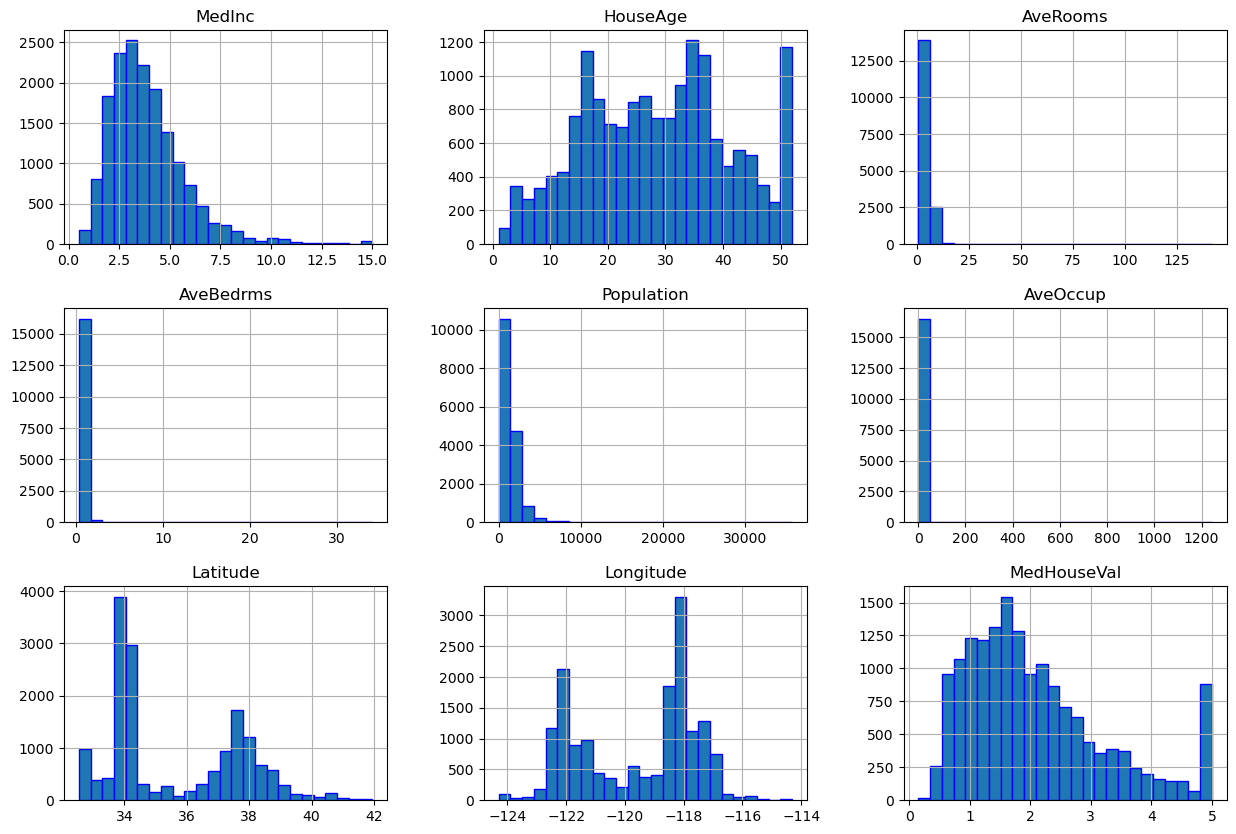

In [16]:
#exploring testing data
df_testing = pd.DataFrame(data=data_testing, columns = df.columns)
df_testing.hist(figsize=(15,10),bins=25,edgecolor="blue")

# 4. Data Preprocessing

In [17]:
#Normalizing values so data is ready to be trained on
#Logarithmic function is applied to features(columns) with extreme differences between samples(rows)
#This normalizes the values for easier training as it avoids overfitting
df_testing["AveBedrms"] = np.log(df_testing["AveBedrms"]+1)
df_testing["AveRooms"] = np.log(df_testing["AveRooms"]+1)
df_testing["Population"] = np.log(df_testing["Population"]+1)
df_testing["AveOccup"] = np.log(df_testing["AveOccup"]+1)


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

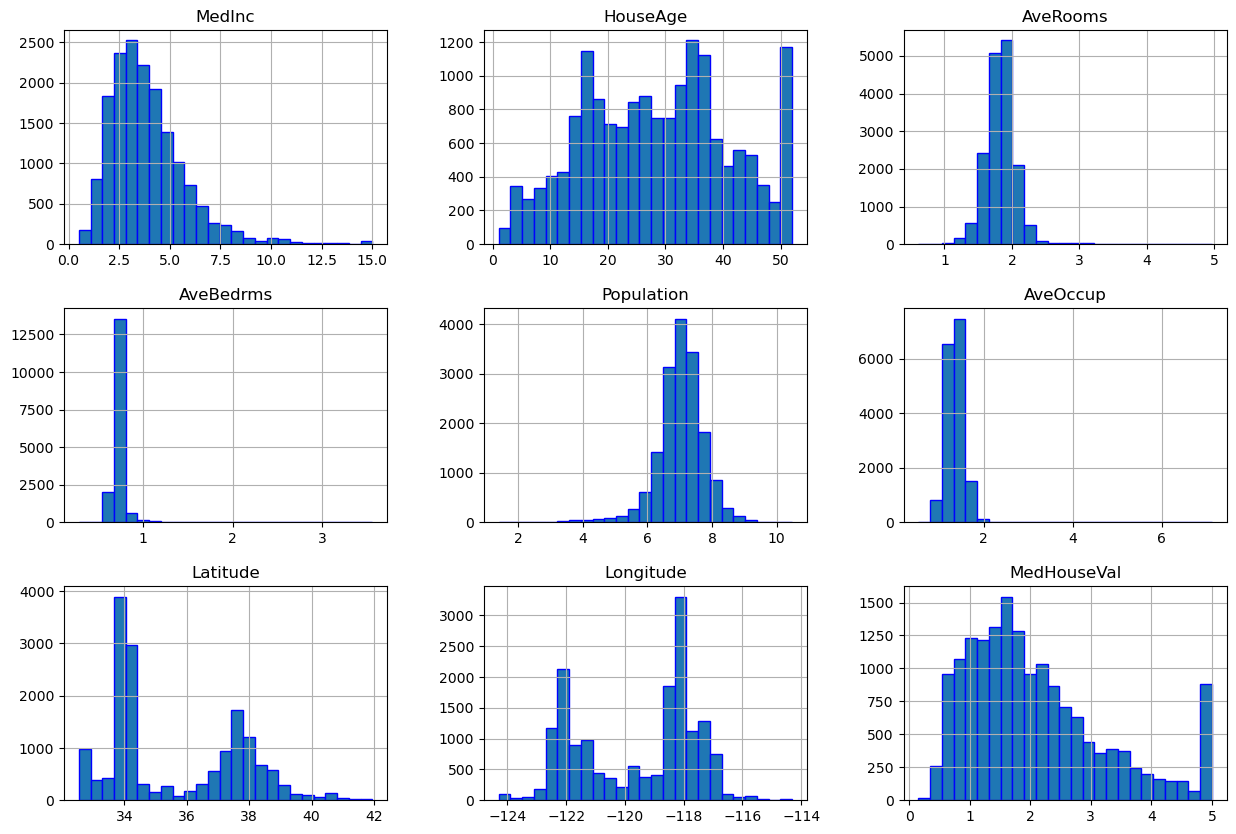

In [18]:
df_testing.hist(figsize=(15,10),bins=25,edgecolor="blue")

In [19]:
#With the graph looking promising, next step is to apply to training model
for i in range(len(X_train)): #this loops through each row(entry)
    for j in range(len(X_train[i])): # this is each column(feature)
        if j > 1 and j < 6: #features needed are all except MedInc and HouseAge (indexes 0,1) and lat/long (indexes 6,7)
            X_train[i][j] = np.log(X_train[i][j]+1)
        

In [20]:
#a problem encountered is the shape of y sets being (n,) instead of (n,1), this heavily impacts results on the model as it uses 
#matrix subtraction
#the solution is reshaping y sets
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
#Furthermore, some values cause overfitting even after processing them
X_train = np.delete(X_train, [2,3,4,5], axis=1)
X_test = np.delete(X_test, [2,3,4,5], axis=1)
#To properly fit the model there need to be columns of 1s first in X vars
#This is done to properly get theta values as there is no theta0x0 currently
X_train = np.vstack((np.ones((X_train.shape[0], )), X_train.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

# 5. The Model - Multiple Linear Regression with Gradient Descent
Reasoning:

Classification Models are not needed as they are better suited for discrete values 
i.e. values can be a,b, or c, where a,b,c = const

Regression algorithms are better suited for this project as they work with continuous values 
i.e. value n in range (x-y)

Linear Regression on its own is a great model for predicting. Implementing it with gradient descent will minimize error for less iterations (epochs) which is perfect for a small-scale project such as this. 

Multiple LR will be used as opposed to OLR as there need to be multiple explanatory variables. 

In [21]:

def get_cost(n,y,y_pred):
    cost = (1/(2 * n)) * np.sum(np.square(y_pred - y))
    #print("GetCost cost:", cost)
    return cost

def grad_desc(n,x,y,y_pred):
    gradient_descent = (1/n)*np.dot(x.T,y_pred - y) 
    #print("gradient_desc shape:",gradient_descent.shape)
    return gradient_descent

#features optional debugs for shapes
def MLR(x,y,epochs,learn_rate):
    n = len(y)
    #print("dataset size(n):",n)
    theta = np.zeros((len(x[0]),1))
    #print("theta shape:",theta.shape) #should be 2d array of shape (features count,1)
    costs = []
    
    for i in range(epochs):
        y_pred = np.dot(x,theta)
        #print("y_pred shape in loop",i,":",y_pred.shape) #should be (features count,1)
        cost = get_cost(n,y,y_pred)
        
        theta_gd = grad_desc(n,x,y,y_pred)
        theta = theta - (learn_rate*theta_gd)
        costs.append(cost)

        if(i%(epochs*0.1)==0):
            print(cost)
    
    #print("theta shape after:",theta.shape) #should be (features count,1)    
    return theta,costs

# 6. Testing the Model

In [22]:
#To test the model, it needs to be trained first

epochs = 10000 #iterations
learn_rate = 0.0000045 #alpha
theta, cost_track = MLR(x=X_train,y=y_train,epochs=epochs,learn_rate=learn_rate)

2.823799346689659
0.6514178399476496
0.6399163903900615
0.6291464063137349
0.6188224811850339
0.6088618375783732
0.5992347802087699
0.5899257143861479
0.5809229784987934
0.5722161858214101


In [23]:
y_pred = np.dot(X_test,theta)
print(y_pred.shape)

err_margin = (1/len(X_test))*np.sum(np.abs(y_pred - y_test[0]))
print(err_margin)

(4128, 1)
0.3664396168819757


In [24]:
#print error and accuracy
print("Error:",round(err_margin,4)*100,"%")
print("Accuracy:", round(1-err_margin,4)*100,"%")

Error: 36.64 %
Accuracy: 63.36000000000001 %


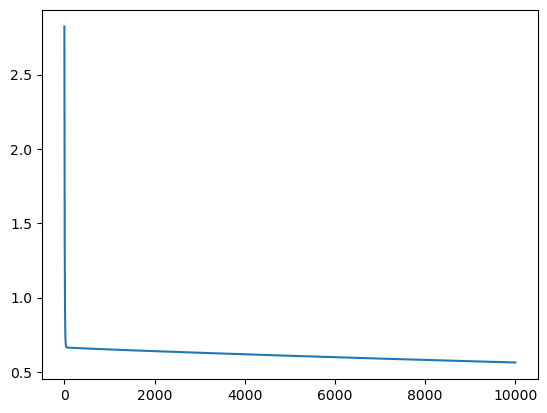

In [25]:
#graph of plot after to show how loss progresses for each epoch
plt_range = np.arange(0, epochs)
plt.plot(plt_range, cost_track)
plt.show()